**Данные**

В этом задании мы вновь рассмотрим данные о пассажирах Титаника. Будем решать на них задачу классификации, в которой по различным характеристикам пассажиров требуется предсказать, кто из них выжил после крушения корабля.

**Инструкция по выполнению**

    Загрузите выборку из файла titanic.csv с помощью пакета Pandas.
    Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).
    Обратите внимание, что признак Sex имеет строковые значения.
    Выделите целевую переменную — она записана в столбце Survived.
    В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст. Такие записи при чтении их в pandas принимают значение nan. Найдите все объекты, у которых есть пропущенные признаки, и удалите их из выборки.
    Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах конструктора DecisionTreeСlassifier).
    Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи (в качестве ответа укажите названия признаков через запятую или пробел, порядок не важен). 

Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.

In [50]:
import pandas as pd
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../data/raw/HSE_ML_week1')

data = pd.read_csv(path.joinpath('titanic.csv'), index_col='PassengerId')
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


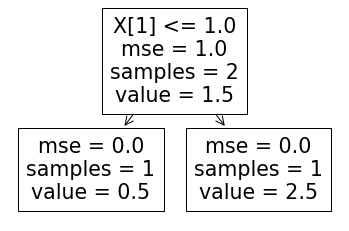

In [4]:
import numpy as np
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

tree.plot_tree(clf);

In [51]:
data = data.dropna(subset = ['Pclass', 'Fare', 'Age', 'Sex'])
passangers = data.loc[:, ('Pclass', 'Fare', 'Age', 'Sex')]

# Make 'Sex' numeric
passangers['Sex'] = passangers['Sex'].factorize()[0]

passangers.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,0
2,1,71.2833,38.0,1
3,3,7.9250,26.0,1
4,1,53.1000,35.0,1
5,3,8.0500,35.0,0


In [52]:
Y = data['Survived']
clf = tree.DecisionTreeClassifier(random_state=241)
clf = clf.fit(passangers, Y)

clf.feature_importances_

array([0.14751816, 0.29538468, 0.25658495, 0.30051221])

In [53]:
file = open('/home/topcoder2k/HSE_ML_week1_answers/attribute_importance.txt', 'w')
file.write('Fare Sex')
file.close()